# <h1> 8-1 합성곱 신경망의 구성 요소 (Convolutional Neural Network) </h1>

* 합성곱 신경망 (Convolutional Neural Network, CNN) : 1개 이상의 합성곱 층을 쓴 인공 신경망

* 필터 (Filter) : 합성곱 신경망에서 뉴런을 부르는 말. 커널(Kernel)이라고도 부른다

* 특성 맵 (Feature Map) : 합성곱 계산을 통해 얻은 출력을 말한다

* 패딩 (Padding) : 입력 배열 주위를 가상의 원소로 채우는 것
  * 세임 패딩 (Same Padding) : 입력과 특성 맵의 크기를 동일하게 하기 위해 입력 주위에 0으로 패딩하는 것
  * 밸리드 패딩 (Valid Padding) : 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우

* 스트라이드 (Stride) : 커널 도장이 상하좌우로 움직이는 이동의 크기를 말함. 기본으로 스트라이드는 1이다.

* 풀링 (Pooling) : 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행함. 그러나 풀링에는 가중치가 없다. 또한 풀링 영역을 설정할 때는 겹치지 않고 이동합니다
  * 최대 풀링 (Max Pooling) : 도장을 찍은 영역에서 최대값을 고름
  * 평균 풀링 (Average Pooling) : 도장을 찍은 영역에서 평균값을 계산함
 
---


<h3> 합성곱 신경망 개념 설명 </h3>



---


1. 합성곱 층과 풀링 층은 거의 항상 함께 사용된다.

2. 합성곱 신경망을 특히 이미지에 있는 특정을 찾아 압축하는 데 뛰어난 성능을 냄




In [ ]:
###########################################################################
#합성곱 신경망의 구성 요소

#합성곱

#케라스 합성곱 층
##패딩과 스트라이드

#풀링

#합성곱 신경망의 전체 구조
##컬러 이미지를 사용한 합성곱

#합성곱 층과 풀링 층 이해하기


**===================================================================================================**

# <h1> 8-2 합성곱 신경망을 사용한 이미지 분류 </h1>

* 지난 절에서 배운 개념의 패션 MNIST 데이터를 이용한 실습
 
---


<h3> 패션 MNIST </h3>


* 사이킷런, 넘파이, 맷플롯립, 텐서플로

---







In [ ]:
###########################################################################
#합성곱 신경망을 사용한 이미지 분류

#패션 MNIST 데이터 불러오기

from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0
#입력 이미지는 항상 깊이(채널) 차원이 있어야함
#흑백 이미지는 채널 차원이 없는 2차원 배열이지만 Conv2D 층을 사용하기 위해 마지막에 채널 차원을 추가함
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42)

###########################################################################
#합성곱 신경망 만들기

model = keras.Sequential()    #신경망 모델 객체 만들기

model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu",   #합성곱 층인 Conv2D 추가
                              padding = "same", input_shape = (28,28,1)))
#32개의 필터 사용, 커널의 크기는 (3,3), 렐루 활성화 함수와 세임패딩 사용, 첫번째 층이라서 input_shape 지정

model.add(keras.layers.MaxPooling2D(2))   #최대 풀링 층 추가 (매개변수 2는 (2,2) 풀링을 의미함)

model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu",   #2번째 합성곱 층 추가
                              padding = "same"))

model.add(keras.layers.MaxPooling2D(2))   #최대 풀링 층 추가

model.add(keras.layers.Flatten())         #Flatten 층으로 3차원 맵을 일렬로 펼친다

model.add(keras.layers.Dense(100, activation = "relu")) #Dense 은닉층 추가

model.add(keras.layers.Dropout(0.4))  #드롭아웃 층 추가, 과대적합 막기 위함

model.add(keras.layers.Dense(10, activation = "softmax")) #Dense 출력층 추가, 소프트맥스 활성화 함수 사용

model.summary()   #구조 파악

keras.utils.plot_model(model)   #plot_model() 함수로 층의 구성을 그림으로 표현
keras.utils.plot_model(model, show_shapes = True)   #show_shapes 매개변수를 True로 설정, 입력과 출력의 크기 표시
#맨 처음에 나오는 InputLayer 클래스는 케라스가 자동으로 추가해주는 것으로 입력층의 역할을 함



42, 43번 코드 출력결과

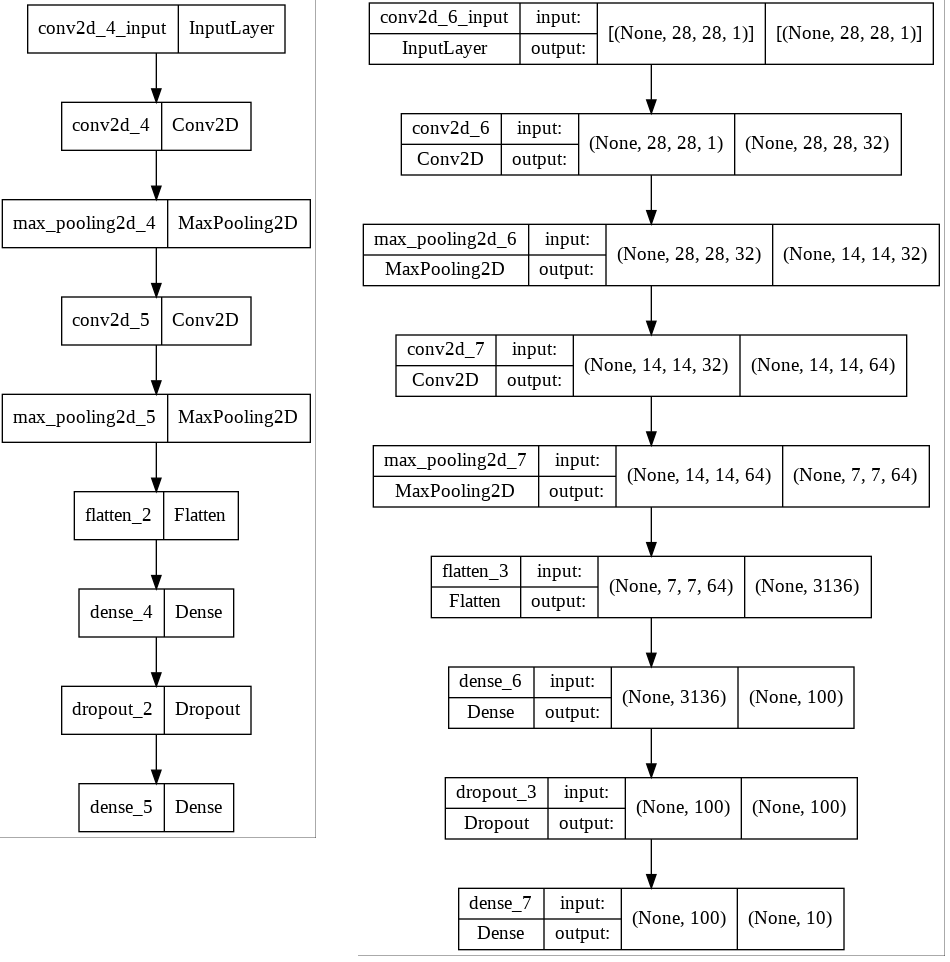

In [ ]:
###########################################################################
#모델 컴파일과 훈련

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-cnn-model.h5", save_best_only = True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
#ModelCheckpoint 콜백과 EarlyStopping 콜백 함께 사용하여 조기 종료 기법을 구현
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, earlystopping_cb])


Epoch 1/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.5248 - accuracy: 0.8131 - val_loss: 0.3178 - val_accuracy: 0.8837
Epoch 2/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.3392 - accuracy: 0.8788 - val_loss: 0.2766 - val_accuracy: 0.8972
Epoch 3/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2870 - accuracy: 0.8955 - val_loss: 0.2620 - val_accuracy: 0.9024
Epoch 4/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2578 - accuracy: 0.9057 - val_loss: 0.2412 - val_accuracy: 0.9119
Epoch 5/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2293 - accuracy: 0.9152 - val_loss: 0.2290 - val_accuracy: 0.9174
Epoch 6/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2112 - accuracy: 0.9218 - val_loss: 0.2188 - val_accuracy: 0.9187
Epoch 7/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.1971 - accuracy: 0.9258 - val_loss: 0.2228 -

Epoch 1/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.5248 - accuracy: 0.8131 - val_loss: 0.3178 - val_accuracy: 0.8837

Epoch 2/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.3392 - accuracy: 0.8788 - val_loss: 0.2766 - val_accuracy: 0.8972

Epoch 3/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2870 - accuracy: 0.8955 - val_loss: 0.2620 - val_accuracy: 0.9024

Epoch 4/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2578 - accuracy: 0.9057 - val_loss: 0.2412 - val_accuracy: 0.9119

Epoch 5/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2293 - accuracy: 0.9152 - val_loss: 0.2290 - val_accuracy: 0.9174

Epoch 6/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2112 - accuracy: 0.9218 - val_loss: 0.2188 - val_accuracy: 0.9187

Epoch 7/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.1971 - accuracy: 0.9258 - val_loss: 0.2228 - val_accuracy: 0.9212

Epoch 8/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.1792 - accuracy: 0.9318 - val_loss: 0.2158 - val_accuracy: 0.9250

Epoch 9/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.1670 - accuracy: 0.9383 - val_loss: 0.2277 - val_accuracy: 0.9208

Epoch 10/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.1532 - accuracy: 0.9422 - val_loss: 0.2195 - val_accuracy: 0.9212

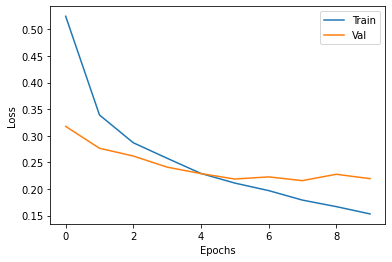

In [ ]:
#손실 그래프를 그려보자

import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.show()

실행 결과

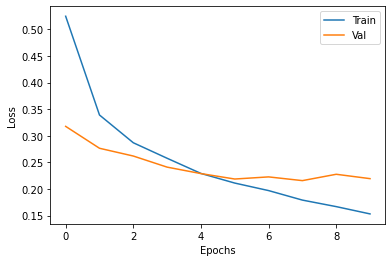

In [ ]:
#검증 세트로 모델 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 7s 19ms/step - loss: 0.2158 - accuracy: 0.9250


[0.21581636369228363, 0.925000011920929]

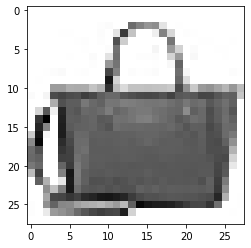

[[9.6896607e-18 8.3456184e-26 7.4239266e-21 2.0796944e-20 3.6659285e-19
  1.6265412e-19 1.3549404e-21 2.7101174e-19 1.0000000e+00 2.0002754e-19]]


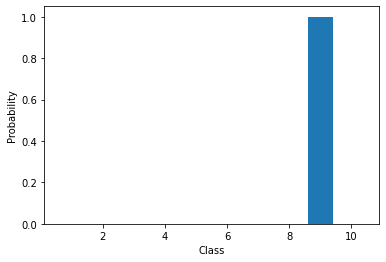

가방
313/313 [==============================] - 5s 14ms/step - loss: 0.2360 - accuracy: 0.9192


[0.23596008121967316, 0.9192000031471252]

In [ ]:
plt.imshow(val_scaled[0].reshape(28,28), cmap = "gray_r") #검증 세트의 첫 샘플 확인
plt.show()

preds = model.predict(val_scaled[0:1])  #해당 샘플의 10개 클래스별 확률 출력
print(preds)                            #지수를 포함하여 출력됨

plt.bar(range(1,11), preds[0])          #막대그래프를 이용해보자 (넘파이 배열이므로 0번 인덱스)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

classes = ["티셔츠", "바지", "스웨터", "드레스", "코트", "샌달", "셔츠", "스니커즈", "가방", "앵클 부츠"]

import numpy as np
print(classes[np.argmax(preds)])

#테스트 세트를 이용하여 합성곱 신경망의 일반화 성능을 측정해보자
test_scaled = test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled, test_target)    #0.9192의 정확도 출력

###########################################################################
#케라스 API로 합성곱 신경망 구현


**===================================================================================================**

# <h1> 8-3 합성곱 신경망의 시각화 </h1>

* 가중치 시각화 : 합성곱 층의 가중치를 이미지로 출력하는 것. 합성곱 신경망은 주로 이미지를 다루기 때문에 가중치가 시각적인 패턴을 학습하는지 알아볼 수 있다.

* 특성 맵 시각화 : 합성곱 층의 활성화 출력을 이미지로 그리는 것. 가중치 시각화와 함께 비교하여 각 필터가 이미지의 어느 부분을 활성화시키는지 확인할 수 있다.

* 함수형 API (Functional API) : 케라스에서 신경망 모델을 만드는 방법 중 하나. Model 클래스에 모델의 입력과 출력을 지정합니다. 전형적으로 입력은 Input() 함수를 사용하여 정의하고 출력은 마지막 층의 출력으로 정의합니다.
 
---


<h3> 패션 MNIST </h3>


* 넘파이, 맷플롯립, 텐서플로

---

1. 합성곱 신경망 모델의 가중치와 특성 맵을 시각화하여 합성곱 층이 입력에서 어떻게 특성을 학습하는지 관찰할 수 있다.

2. 입력에 가까운 합성곱 층은 이미지에서 시각적인 정보나 패턴을 감지하도록 훈련된다. 이어지는 합성곱 층은 이런 시각적인 정보를 활용해 조금 더 고차원적인 개념을 학습하며 층이 추가될수록 이런 현상은 더욱 강해진다.

3. 함수형 API를 사용하면 복잡한 조합의 모델을 자유롭게 구성할 수 있습니다.






(3, 3, 1, 32) (32,)
-0.035898242 0.25607964


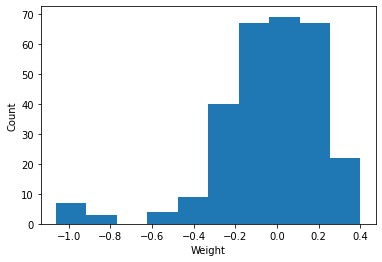

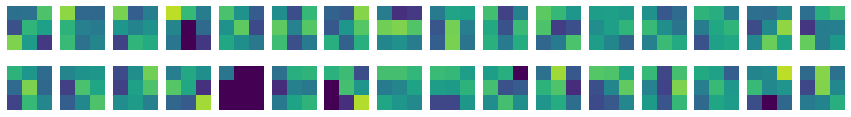

(3, 3, 1, 32)
0.0016267507 0.08326847


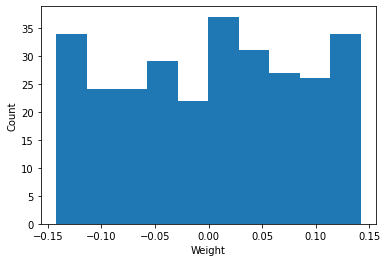

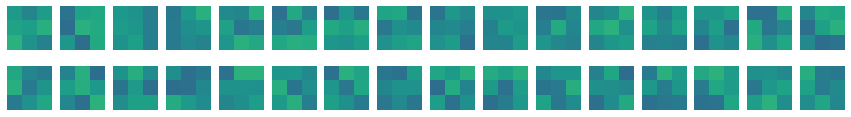

In [ ]:
###########################################################################
#합성곱 신경망의 시각화

#가중치 시각화

from tensorflow import keras
model = keras.models.load_model("best-cnn-model.h5")  #2절에서 만들어진 모델 불러오기
model.layers    #케라스 모델에 추가된 층 확인

conv = model.layers[0]    #모델의 첫번째 층 (첫번째 합성곱 층)
print(conv.weights[0].shape, conv.weights[1].shape) #층의 가중치와 절편은 층의 weights 속성에 저장되어 있음
# 가중치, 절편 순서. (3, 3, 1, 32) (32,) 출력. 

conv_weights = conv.weights[0].numpy()    #다루기 쉽게 Tensor 클래스의 객체에서 넘파이 배열로 변환하자
print(conv_weights.mean(), conv_weights.std())  #평균과 표준편차 출력. -0.0358, 0.2560 출력

import matplotlib.pyplot as plt     #직관적으로 이해하기 쉽도록 히스토그램을 그려보자
plt.hist(conv_weights.reshape(-1,1))  #히스토그램을 그리기 위해 1차원 배열로 전달
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()

#이번에는 32개의 커널을 16개씩 두 줄에 출력해보자
f, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,16*i+j], vmin = -0.5, vmax = 0.5)  #마지막 차원을 순회하면서 가중치 값들을 출력
    axs[i,j].axis("off")
plt.show()
#vmin, vmax : 맷플롯립의 컬러맵으로 표현할 범위를 지정

#-----------------------------------------------------------
#이번에는 훈련하지 않은 빈 합성곱 신경망을 만들어 가중치가 어떻게 다른지 비교해보자
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", 
                                          padding = "same", input_shape = (28, 28, 1))) #첫번째 층 생성
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)  #(3, 3, 1, 32) 출력

no_training_weights = no_training_conv.weights[0].numpy()   #넘파이 배열로 변환
print(no_training_weights.mean(), no_training_weights.std())    #평균과 표준편차 출력

plt.hist(no_training_weights.reshape(-1,1))     #가중치 배열 시각화
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()
#대부분의 가중치가 -0.15 ~ 0.15 사이에 있고 고른 분포를 보임
#텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하게 하기 때문

f, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,16*i+j], vmin = -0.5, vmax = 0.5)  
    axs[i,j].axis("off")
plt.show()    #그림으로 출력
#전체적으로 가중치를이 밋밋하게 변함
#-----------------------------------------------------------



KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_6_input'), name='conv2d_6_input', description="created by layer 'conv2d_6_input'")


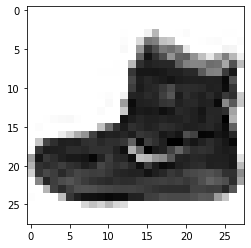

(1, 28, 28, 32)


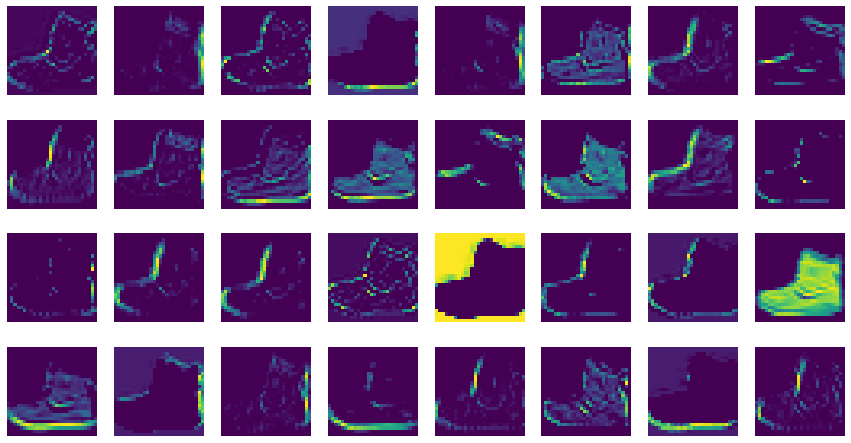

(1, 14, 14, 64)


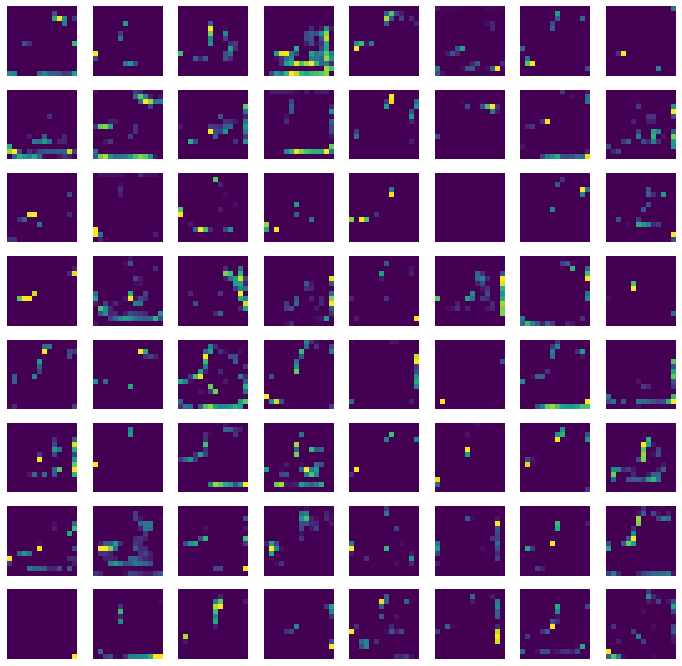

In [ ]:
###########################################################################
#함수형 API (Functional API)
#입력이 여러개이거나 출력이 여러개인 신경망 모델 : Sequential() 클래스를 사용하기 힘들다
#대신 함수형 API 사용
#특정 층의 출력을 알고 싶을때 유용하게 사용할 수 있다

print(model.input)    #input 속성을 이용하여 model 객체의 입력값 출력

#model.input 과 model.layers[0].output 을 연결하는 새로운 모델을 만들어보자
conv_acti = keras.Model(model.input, model.layers[0].output)

###########################################################################
#특성 맵 시각화
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()      #데이터셋 불러오기

plt.imshow(train_input[0], cmap = "gray_r") #훈련세트의 첫번째 샘플 확인
plt.show()

#이 샘플을 conv_acti에 주입하여 Conv2D 층이 만드는 특성 맵을 출력해보자
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0    #전처리
feature_maps = conv_acti.predict(inputs)  #conv_acti 모델의 예측값 저장
print(feature_maps.shape)   #예측한 데이터의 크기 확인. (1, 28, 28, 32) 출력

#특성 맵을 그려보자
f, axs = plt.subplots(4, 8, figsize = (15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis("off")
plt.show()

#2번째 합성곱 층이 만든 특성맵도 확인하여보자
conv2_acti = keras.Model(model.input, model.layers[2].output) #model 객체의 입력과 두번째 합성곱 층의 출력을 연결
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv2_acti.predict(inputs) #첫번째 샘플을 predict 매서드에 전달
print(feature_maps.shape)   #예측한 데이터의 크기 확인. (1, 14, 14, 64) 출력

f, axs = plt.subplots(8, 8, figsize = (12,12))  #64개의 특성 맵을 그려보자
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis("off")
plt.show()  
#시각적으로 이해하기 힘들다.
#첫번째 합성곱 층의 출력값이 두번째 합성곱 층의 필터와 곱해졌기 때문.
#이런 현상을 합성곱 층을 더 많이 쌓을 수록 심해진다.
#앞부분의 합성곱 층은 이미지의 시각적인 정보를 감지하고, 
#뒤쪽의 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼 수 있다

###########################################################################
#시각화로 이해하는 합성곱 신경망


32개 필터와 특성맵들을 비교하여보자

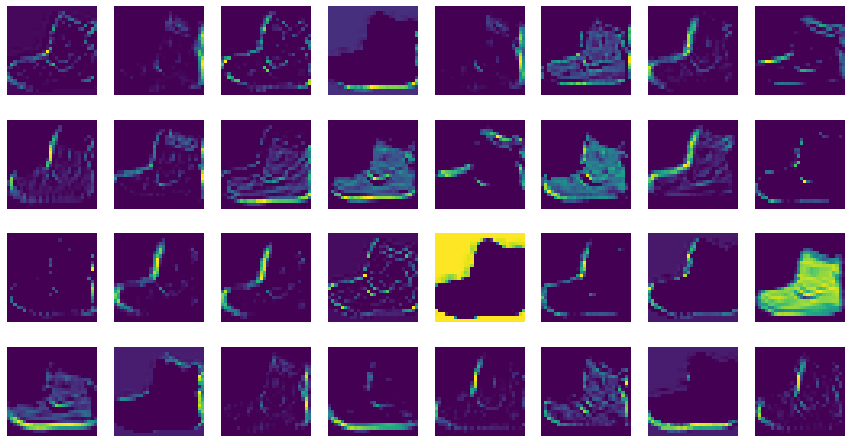

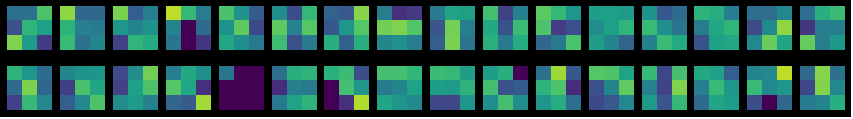

**===================================================================================================**